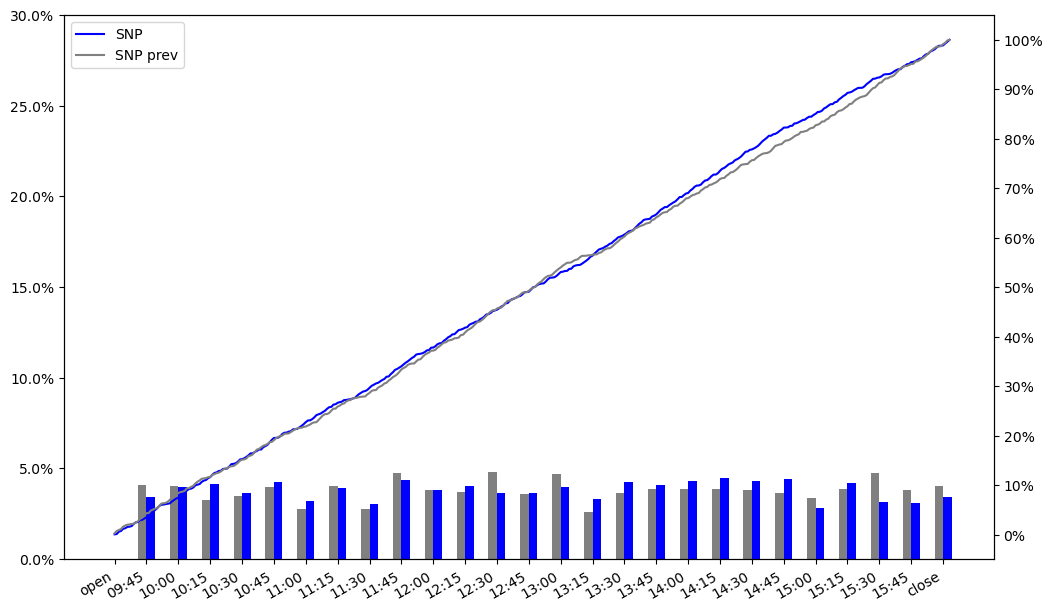

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import datetime

# Загрузка данных из CSV-файла в DataFrame
data = pd.read_csv('/home/u802270231/loads/data.csv')
df = pd.DataFrame(data)

# Создание данных для графиков
idx = df.index.tolist()
dts = [datetime.datetime(2025, 1, 31, 9, 30) + datetime.timedelta(minutes=i) for i in idx]
x = [dt.strftime("%H:%M") for dt in dts]
x[0] = 'open'
x[390] = "close"
y1 = df['cum SNP'].tolist()
y2 = df['cum SNP prev'].tolist()

def inc15(a):
    res = [0]
    for i in range(0, len(a)-15, 15):
        res.append(a[i+15]-a[i])
        #print("i, a", i, a[i])
    return res
z1 = inc15(y1) #+ [0]
z2 = inc15(y2) #+ [0]

# Создание рисунка и осей
fig, ax1 = plt.subplots(figsize=(12, 8))

# Построение столбчатого графика  
ax1.bar(np.arange(0, len(x), 15) + 2, z1, width=4, color='blue') 
ax1.bar(np.arange(0, len(x), 15) - 2, z2, width=4, color='gray')
ax1.tick_params(axis='y')

# Создание второй оси для линейного графика
ax2 = ax1.twinx()

# Построение первого графика
ax2.plot(x, y1, 'blue', label='SNP')

# Построение второго графика
ax2.plot(x, y2, 'gray', label='SNP prev')

# Изменение оси Y на проценты
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.gcf().autofmt_xdate()

# Изменение шага
ax1.set_yticks(np.arange(0, 0.35, 0.05))
ax2.set_yticks(np.arange(0, 1.1, 0.1))
ax2.set_xticks(np.arange(0, len(x), 15))

# Добавление легенды
ax2.legend() 

#Сохранение картинки
plt.savefig("image.png", dpi=300, transparent=False)

# Отображение графиков
plt.show()